<a href="https://colab.research.google.com/github/Pranabm1987/Avighna/blob/master/Ascend_Pro_Hackathon_ML_Basics_13_03_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Data Manipulation & Summarisation
import numpy as np 
from numpy import sqrt, abs, round
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

# Regex for working with text features
import re

# Datetime for working with datetime features
from datetime import timedelta, date

# Modules required for statistical tests
from scipy.stats import norm
from scipy.stats import t as t_dist
from scipy.stats import chi2_contingency

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


### Step1: Loading the Data  ###

In [ ]:
train =pd.read_csv('/content/train_AvX1lTZ.csv')

In [ ]:
test = pd.read_csv('/content/test_tERCnnc.csv')

In [ ]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


#### We will have look at the Shape of the Data .i.e Number of rows and columns ###

In [ ]:
train.shape

(43400, 12)

*** So There are 43400 rows and 12 columns in the train file ***

In [ ]:
test.shape

(18601, 11)

In [ ]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


** Approaching the ML problem **
 ###  1 . Load the Data    ###
  ### 2.** EDA (Exploratory Data Analysis)** with the intention to identify the " problem in the Data" ###

  ### 2a.Finding the features having lots of Missing values , Outliers.###
   ### 2b. Checking if the output Var is significantly " imbalanced" ###
  ### 2c. Checking for **multicollinearity** in the data. ###
###   2d . Checking for redundant Features, features with (lots of) constant values, categorical features with large number of unique values. ####

### 3. Data Cleaning : missing value removal , Outliers ,..etc ###
### 4. Dimentionality Reduction : Feature Selection or Feature Extraction ###

### 5. Feature scaling & Transformation Scaling : MinmaxScalar , StandardScalar , Normalizer,
Numerical Transformation :powertransform , log, sqrt,  Categorical Trans: Label Encoding or  One Hot Encoding 

### 6. Creating the baseline model:

Train-test-Split








###

### Now we will start with 
** EDA ** 


In [ ]:
train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### 1. Variables like *** Gender , ever_married, work_type, Residence_type, smoking_status *** Should be converted to categorical type .

### 2, Variable like *** age *** should be converted to int64 type .

### 3. Converting Variables type object into  Categories.


In [ ]:
train['gender'] = train['gender'].astype('category')
train['ever_married'] = train['ever_married'].astype('category')
train['work_type'] = train['work_type'].astype('category')
train['Residence_type'] = train['Residence_type'].astype('category')
train['smoking_status'] = train['smoking_status'].astype('category')

In [ ]:
train.dtypes
# looking at the data after conversion 

id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

### Now we will convert *** age *** into dtype int64
because age is expected to be in whole number.

In [ ]:
train['age']= train['age'].astype('int64')

In [ ]:
train['age'].dtypes

dtype('int64')

### Now we will ***check for  missing values*** in the data using isnull() function.

In [ ]:
train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

# Imputing the missing values

### (1)  AS data type of of BMI is float we will use **MEDIAN** to **impute the missing values***

### (2) As data type of Smoking_status is categorical we will use **mode** to fill the missing values

In [ ]:
# Checking for Median of BMI column
train.bmi.median()

27.7

In [ ]:
# Imputing the missing values of BMI column
train.loc[(train.bmi.isna()== True) , 'bmi'] = train.bmi.median()

In [ ]:
# Checking for mode of Smoking_status
train['smoking_status'].mode()

0    never smoked
Name: smoking_status, dtype: category
Categories (3, object): ['formerly smoked', 'never smoked', 'smokes']

In [ ]:
train['smoking_status'].unique()

['never smoked', 'formerly smoked', 'smokes']
Categories (3, object): ['never smoked', 'formerly smoked', 'smokes']

In [ ]:
# imputing the missing values of smoking_status column
train['smoking_status'] = train['smoking_status'].fillna('never smoked')

In [ ]:
# rechecking for missing values
train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# From Above it is clear that we have successfully imputed the missing values

In [ ]:
target = train['stroke']

In [ ]:
# Custom function for easy visualisation of Categorical Variables
def EDA_category(data, var_group):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    
    fig = plt.figure(figsize = (7*size,5), dpi = 100)
    fig.canvas.draw()
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=100000, rect=None)

    # for every variable
    for j,i in enumerate(var_group):
        
        # Plotting the variable with every information
        plt.subplot(1,size,j+1)
        
        
        ax = sns.countplot(x=i, data=data, orient = 'h')        
        
        plt.xlabel('{}'.format(i), fontsize = 12)
    
        ncount = data.shape[0] - pd.isnull(data[i]).sum()
        
        # Make twin axis
        ax2=ax.twinx()

        # Switch so count axis is on right, frequency on left
        ax2.yaxis.tick_left()
        ax.yaxis.tick_right()

        # Also switch the labels over
        ax.yaxis.set_label_position('right')
        ax2.yaxis.set_label_position('left')

        ax2.set_ylabel('Frequency [%]')

        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') # set the alignment of the text

        # Use a LinearLocator to ensure the correct number of ticks
        ax.yaxis.set_major_locator(ticker.LinearLocator(11))

        # Fix the frequency range to 0-100
        ax2.set_ylim(0,100)
        ax.set_ylim(0,ncount)

        # And use a MultipleLocator to ensure a tick spacing of 10
        ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

        # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
        ax2.grid(alpha = 0.1)

        plt.show

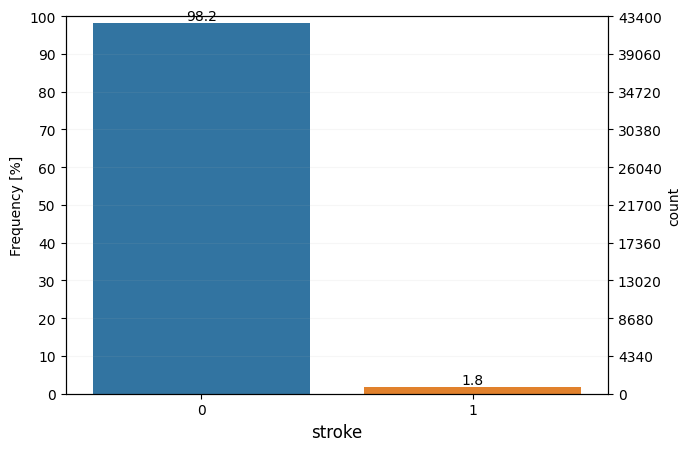

In [ ]:
EDA_category(train, ['stroke'])

### It is clear that stroke is highly imbalanced class

In [ ]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

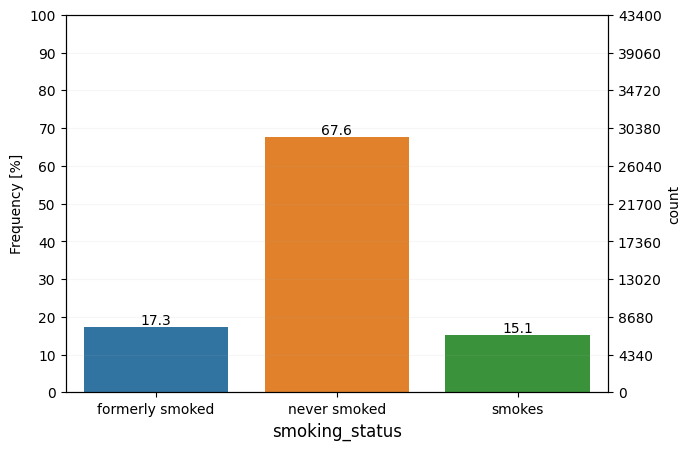

In [ ]:
EDA_category(train, ['smoking_status'])

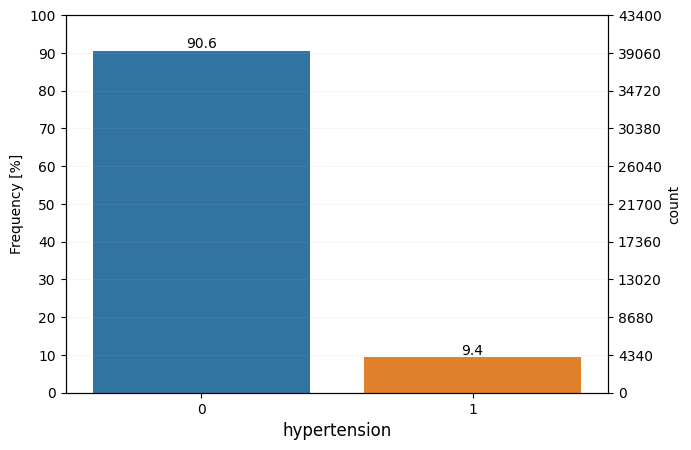

In [ ]:
EDA_category(train, ['hypertension'])

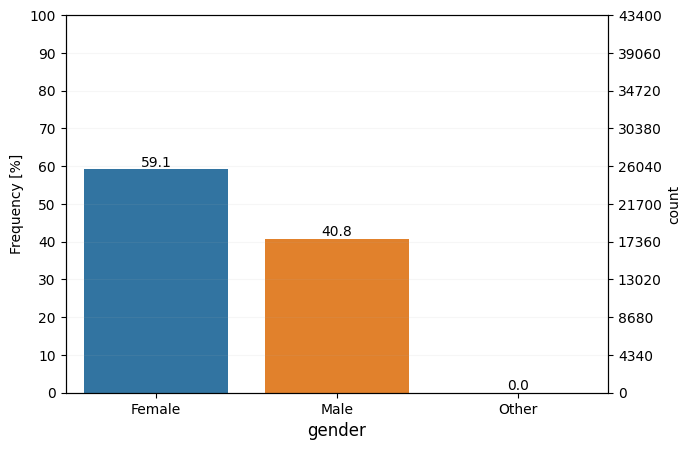

In [ ]:
EDA_category(train, ['gender'])

In [ ]:
# custom function for easy and efficient analysis of numerical univariate
def EDA_numeric(data, var_group, log = False):
      
    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 100)
      #looping for each variable
    for j,i in enumerate(var_group):

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
       # calculating points of one standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        ax = sns.kdeplot(data[i], shade=True)
        
        if log == True:
            ax.set_xscale('log')
        else:
            pass

        plt.xlabel('{}'.format(i), fontsize = 13)
        plt.ylabel('density')
        plt.title('std_dev = {};range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                       
                                                                                                       (round(mini,2),round(maxi,2)),
                                                                                                       round(mean,2),
                                                                                                       round(median,2)))

In [ ]:
train.dtypes

id                      int64
gender               category
age                     int64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

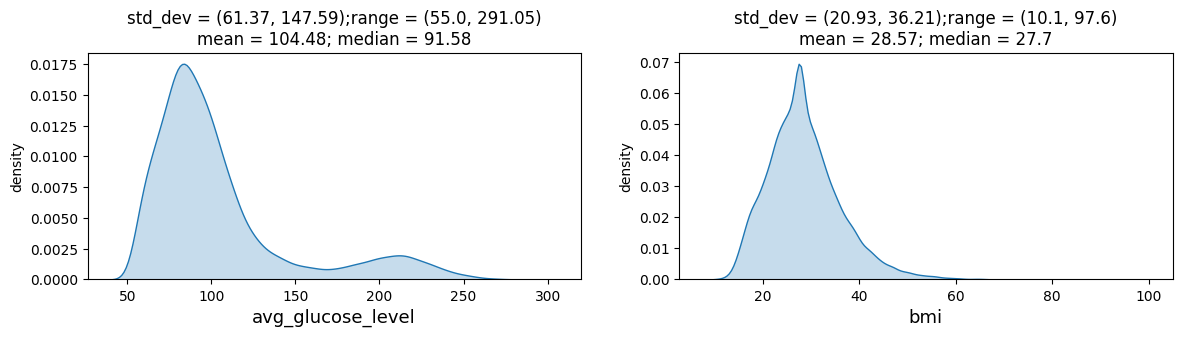

In [ ]:
# avg_glucose_level & bmi
EDA_numeric(train,['avg_glucose_level','bmi'],log = False)

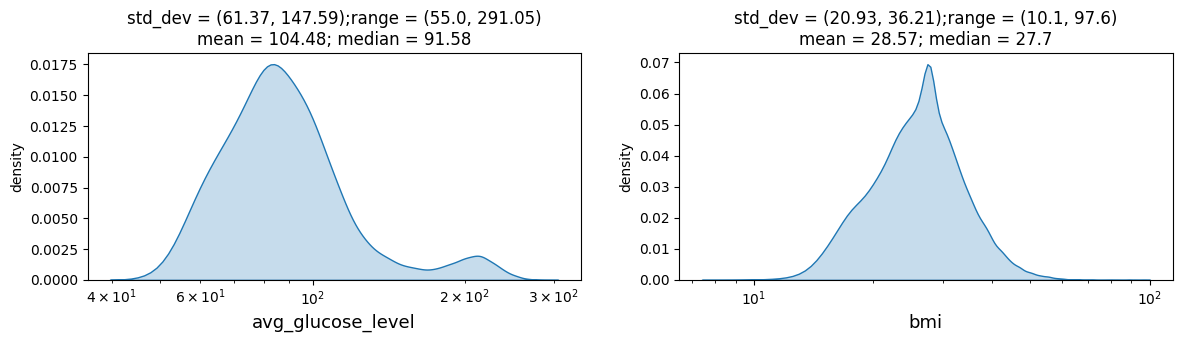

In [ ]:
# avg_glucose_level & bmi
EDA_numeric(train,['avg_glucose_level','bmi'],log = True)

In [ ]:
train['age'].var(),train['age'].std()

(508.19400158142577, 22.543158642511163)

What can i interpret  by variance of 508.19 and Standard deviation of 22.54

In [ ]:
train["avg_glucose_level"].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

In [ ]:
train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
Stroke_age = train[train['stroke']==1]['age']

Not_stroke_age = train[train['stroke']== 0]['age']
Stroke_age.shape, Not_stroke_age.shape

((783,), (42617,))

<function matplotlib.pyplot.legend>

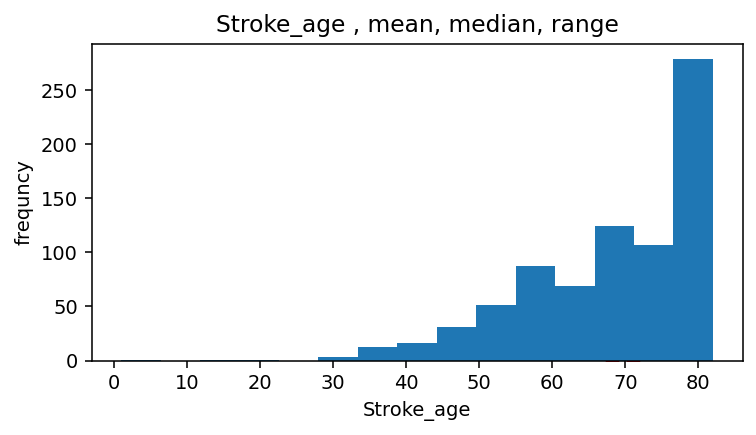

In [ ]:
# setting image resolution
plt.figure(figsize = (6,3), dpi= 140)

# plotting histogram and descriptive summary
plt.scatter(Stroke_age.mean(),0,label = 'mean', color = 'red')
plt.scatter(Stroke_age.median(),0,label = 'median', color = 'red')
plt.hist(Stroke_age, bins=15)

# axes labels
plt.xlabel('Stroke_age')
plt.ylabel('frequncy')
plt.title('Stroke_age , mean, median, range')
plt.legend

### 1.The data Stroke_age is Left skewed .

### 2.more number of People with age above 60 are having stroke.

### 3. Almost everyone in the age bracket above 75 are likely to suffer from stroke


 -

<function matplotlib.pyplot.legend>

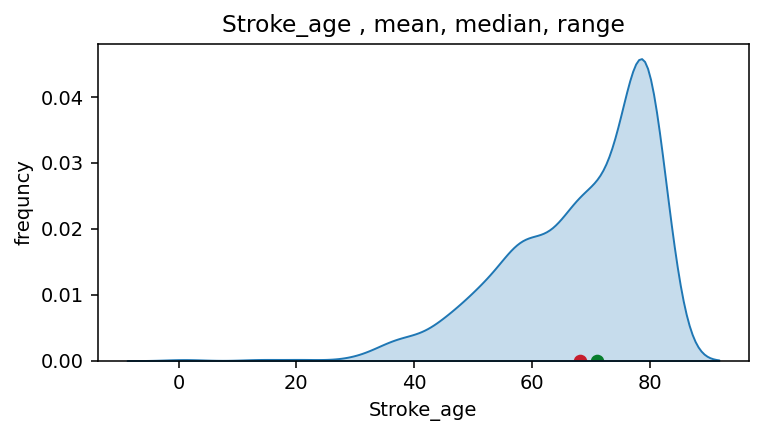

In [ ]:
# setting image resolution
plt.figure(figsize = (6,3), dpi= 140)

# plotting histogram and descriptive summary
plt.scatter(Stroke_age.mean(),0,label = 'mean', color = 'red')
plt.scatter(Stroke_age.median(),0,label = 'median', color = 'green')
sns.kdeplot(Stroke_age, shade = True)

# axes labels
plt.xlabel('Stroke_age')
plt.ylabel('frequncy')
plt.title('Stroke_age , mean, median, range')
plt.legend

### 1.Now we want to check how many smoking people are more likely to suffer from stroke

### 2. As smoking_status is categorical data type so we cannot perform statistical operation like  *** mean , median ,  std, var

### 3. We cannot draw kde plot to visualize categorical data like 

# Univariate Analysis

In [ ]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

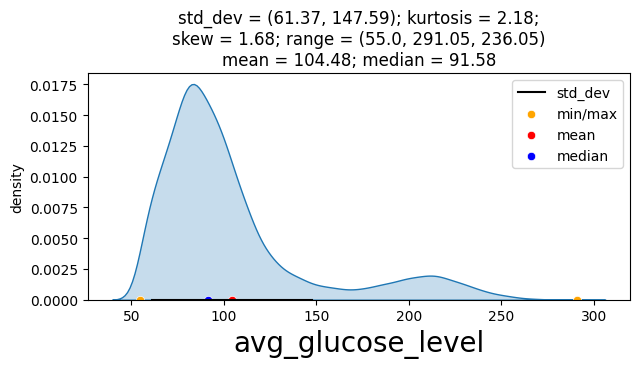

In [ ]:
UVA_numeric(train, ['avg_glucose_level'])

In [ ]:
import statsmodels.api as sm
import pylab as py

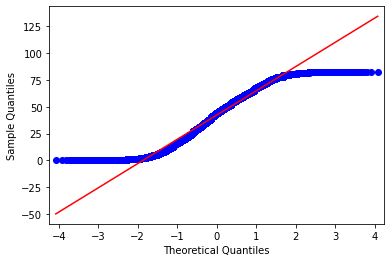

In [ ]:
#normality check
sm.qqplot(train['age'], line='s')
plt.show()

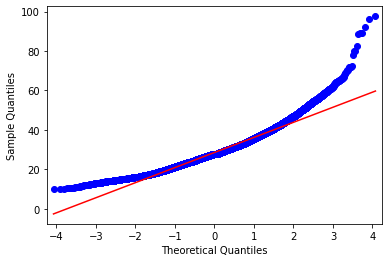

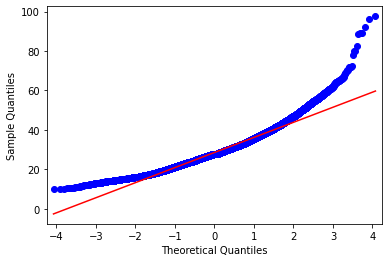

In [ ]:
# Normality check
sm.qqplot(train['bmi'], line='s')

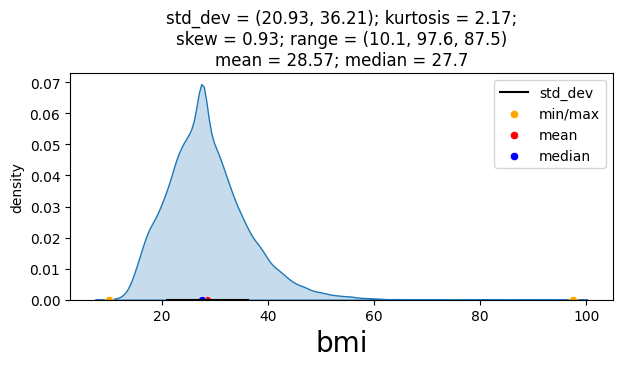

In [ ]:
UVA_numeric(train, ['bmi'])

*** Univariate Analysis : Categorical Varibales***

In [ ]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

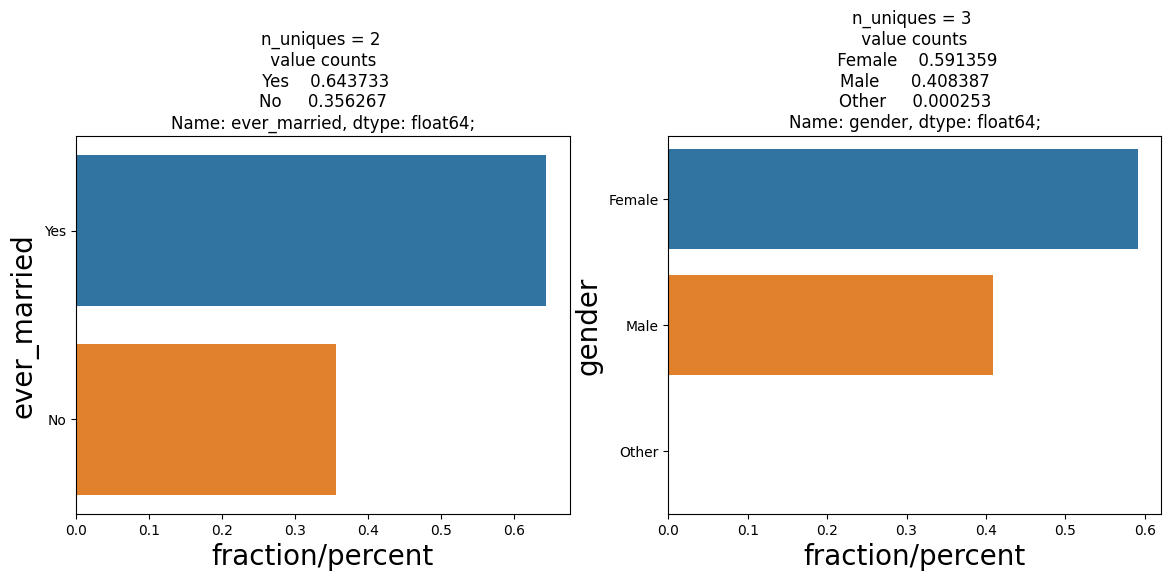

In [ ]:
UVA_category(train, ['ever_married', 'gender'])

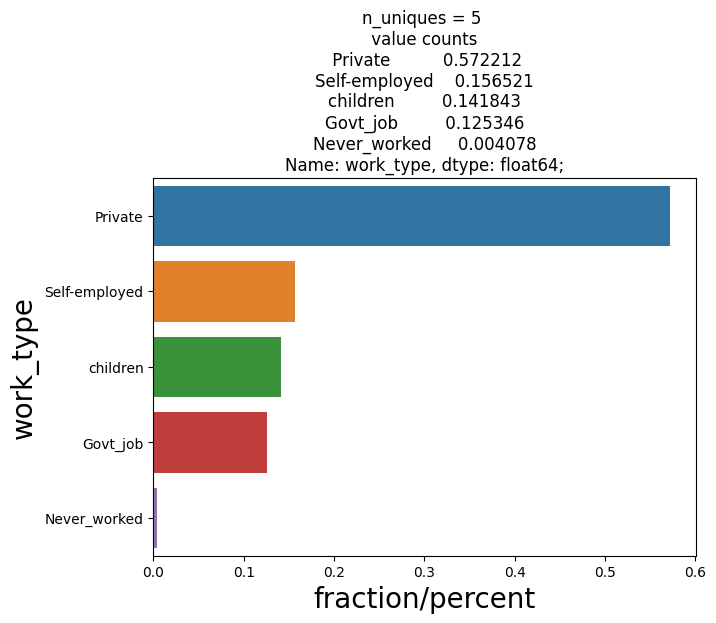

In [ ]:
UVA_category(train, ['work_type'])

### Above data is highly imbalanced 

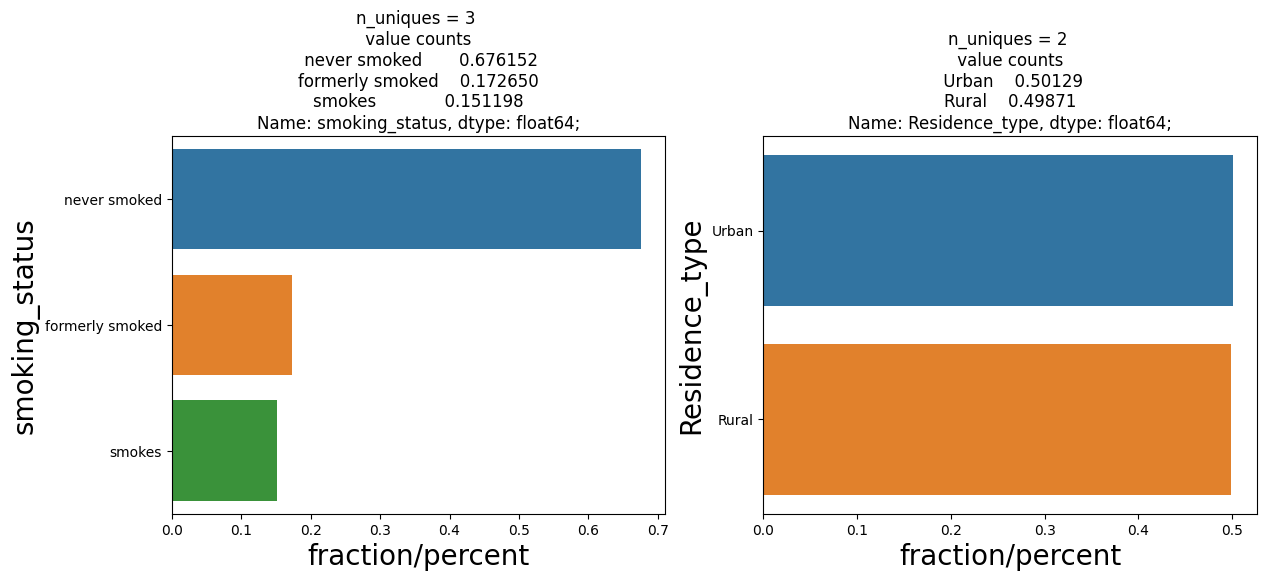

In [ ]:
UVA_category(train, ['smoking_status', 'Residence_type'])

###  From Above it is clear that Residence_Type is balanced class i.e almost equal number of residence for Urban and Rural

### While Smoking_Status is Imbalanced class almost 67.6% of people are non-smoker  , 17.2% are formerly smoked they do not smoke now and approx 15.11% of people are currently smokers

In [ ]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

In [ ]:
train.columns

True


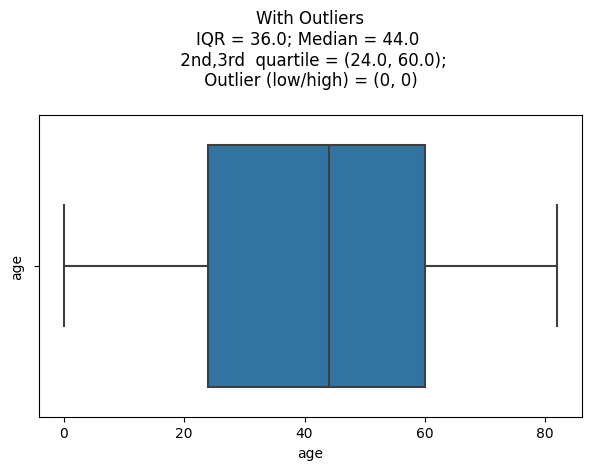

In [ ]:
UVA_outlier(train, ['age'], include_outlier = True)

There is no outlier in age data

True


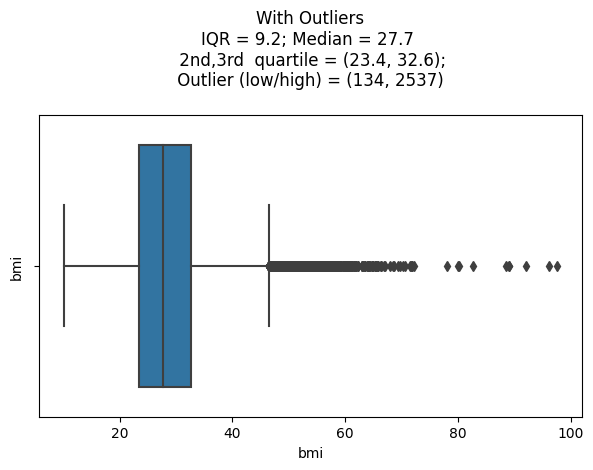

In [ ]:
UVA_outlier(train, ['bmi'], include_outlier = True)

True


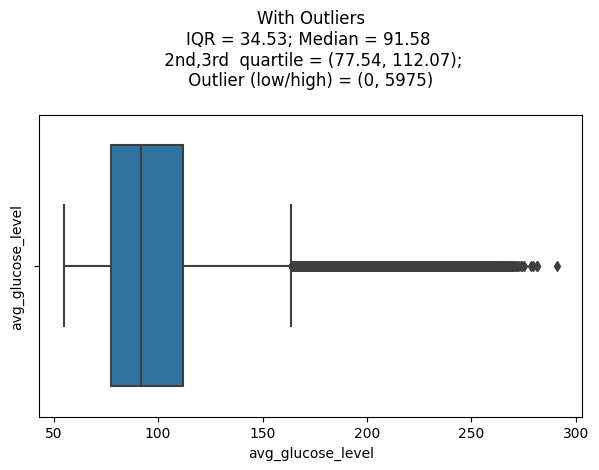

In [ ]:
UVA_outlier(train, ['avg_glucose_level'], include_outlier = True)

### From the Above two BOX-PLOT of BMI and AVG_Glucose_Level it is clear that there  is lot of Out-lier in BMI as well as AVG_glucose_level 

### So we have to deal with the Outlier in these two column

In [ ]:
bmi_Q1 = train['bmi'].quantile(0.25)
bmi_Q3 = train['bmi'].quantile(0.75)

In [ ]:
IQR = bmi_Q3-bmi_Q1

In [ ]:
IQR

9.200000000000003

In [ ]:
low_extreme = bmi_Q1 -1.5*IQR
up_extreme = bmi_Q3 + 1.5*IQR

In [ ]:
out1 =train[(train['bmi']< low_extreme)].values
out2 = train[(train['bmi']< up_extreme)].values

In [ ]:
train['bmi'].replace(out1,low_extreme, inplace=True)
train['bmi'].replace(out2,up_extreme, inplace=True)

In [ ]:
# Dropping the outlier in BMI
out = train[(train['bmi'])< low_extreme)|(train['bmi']>up_extreme)].index
train.drop(out, inplace=True, axis= 1)

SyntaxError: ignored

### Bi-Variate analysis : Categorical-Categorical

In [ ]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

 ### Are Female more likely to have stroke

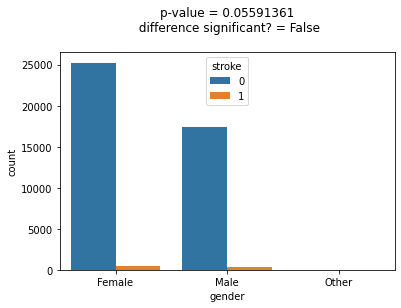

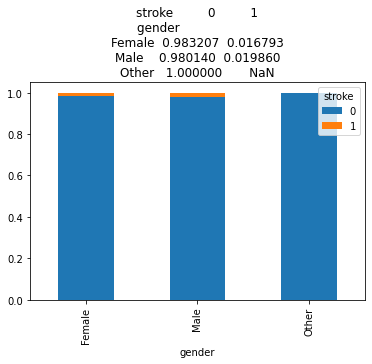

In [ ]:
BVA_categorical_plot(train, 'stroke', 'gender')

In [ ]:
train['gender'].value_counts()

 ### So there is no significant difference between Male and female likely to have stroke

 ### Both are equally likely to have stroke


 ### (1) Are Smokers more likly to have Stroke than non- Smokers

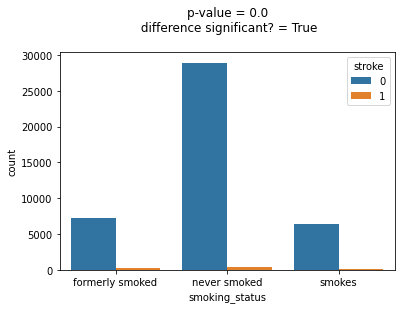

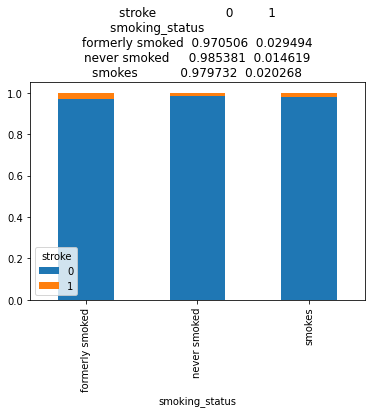

In [ ]:
BVA_categorical_plot(train, 'stroke', 'smoking_status')

### 1.Our hypothesis is true Smokers are more likely to have strokes than non- smokers

### 2. We can also see from the plot that p-vale is significantly small

In [ ]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

 ### Hypothesis testing

 ### 1. Are people with hypertension more likely to have stroke



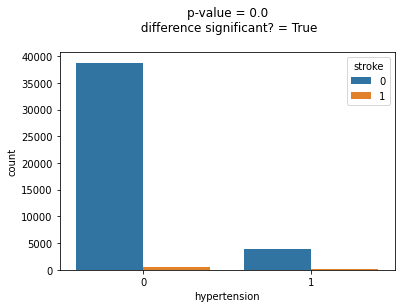

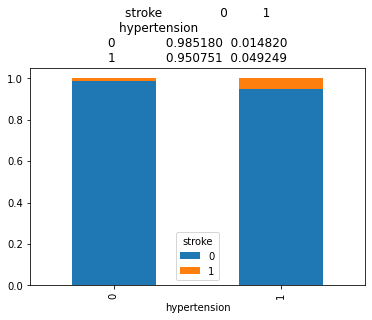

In [ ]:
BVA_categorical_plot(train, 'stroke', 'hypertension')

### Yes our Hypothesis is true that people suffering from hypertension are more likely to have stroke

 *** Hypothesis Testing *** 
 ### Are people suffering from heart_disease more likely to have stroke

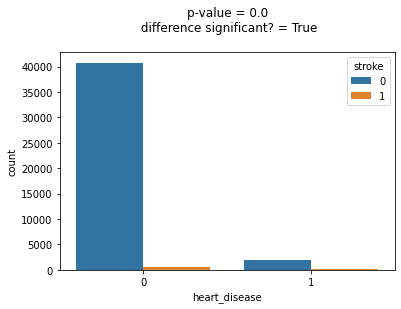

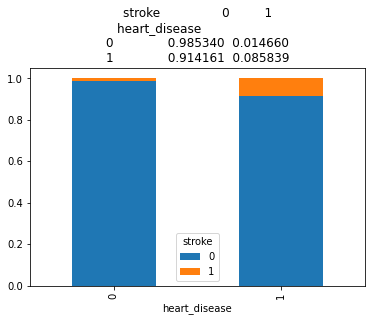

In [ ]:
BVA_categorical_plot(train, 'stroke', 'heart_disease')

### Yes our Hypothesis is True that people suffering from  heart disease are more likely to have strike

*** Are ever_married more likely to have stroke***

###
*** Hypothesis testing***

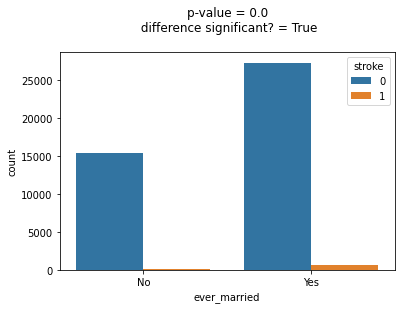

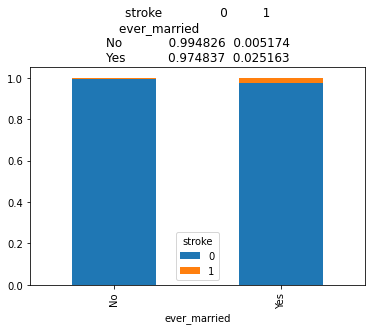

In [ ]:
BVA_categorical_plot(train, 'stroke', 'ever_married')

### Yes our hypothesis is true that married  people are more likely to have stroke than un-married and the difference is significant

In [ ]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

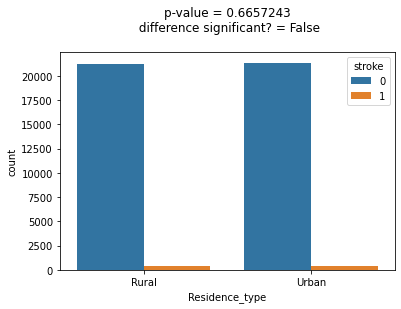

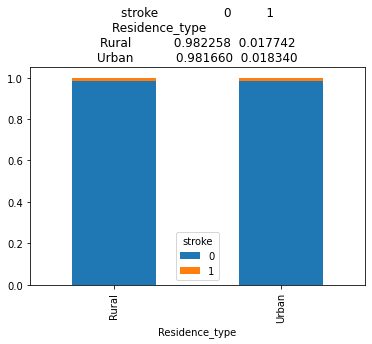

In [ ]:
BVA_categorical_plot(train, 'stroke', 'Residence_type')

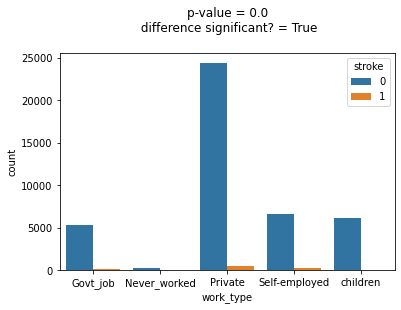

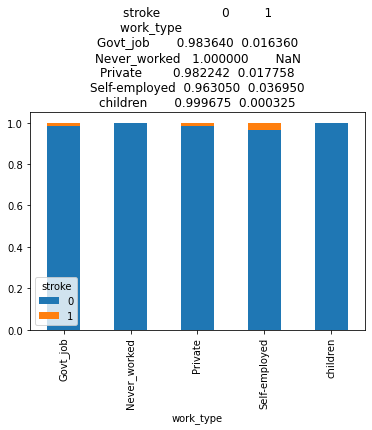

In [ ]:
BVA_categorical_plot(train, 'stroke', 'work_type')

In [ ]:
train['work_type'].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

# Conclusion from Bivariate Analysis
###  (1) Male and Female are equally likely to have stroke , so having stroke does not depend upon gender of a person.

### (2) Married person are more likely to have stroke than unmarried .

### (3) Smokers are more likely to have stroke than non- smokers.

### (4) Person suffering from hypertension are more likely to have stroke than those not having hypertension.

### (5) Person suffering from heart disease are more likely to have stroke than those not having heart disease.

### (6) When it comes to work type then Self-employed are more likely to have stroke than prive employee and government employee.

### (7) A will suffer from stroke or not does not depend upon Residence_type.



### Data Cleaning

### Creating the Dataset ready for predictive modelling

In [ ]:
#from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    #ax.set_facecolor("k")

In [ ]:
Y_train.columns

In [ ]:
Y_train['bmi'].isnull().sum()

 # Checking the missing value 

# Data Preprocessing 
 . Missing values are imputed
 ### .Categorical variable are encoded
###. variable with string have been removed

In [ ]:
test['smoking_status'].isnull().sum()

5751

In [ ]:
# creating the categorical columns
Cat_cols = ['ever_married','gender','work_type','Residence_type','smoking_status']

In [ ]:
train[Cat_cols].nunique()
# Trying to know the number of unique value in a category

ever_married      2
gender            3
work_type         5
Residence_type    2
smoking_status    3
dtype: int64

 ## 1. We will **one hot encode**,ever_married, gender, Residence_type
  
  ## 2. use **Label Encoder** for work_type and smoking_status

In [ ]:
pd.get_dummies(train['ever_married']).head()

,No,Yes
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [ ]:
data_cleaned = train.copy()

## We have to drop  the target variable Stroke from data

In [ ]:
x = data_cleaned.drop(['stroke'], axis=1)
y = data_cleaned['stroke']

In [ ]:
x  = pd.get_dummies(x)
x.head()

 ## We have to drop  the target variable Stroke from data

- As i have encoded the categorical variable 
- Now i will scale the Continuous variable

In [ ]:
data_cleaned.head()

In [ ]:
df_con_var=data_cleaned.loc[:, ['age','avg_glucose_level','bmi']]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:
scaler = MinMaxScaler()

min_max_scaler = preprocessing.MinMaxScaler()
df_con_var_minmax = min_max_scaler.fit_transform(df_con_var)

In [ ]:
# converting the ndarray to DataFrame
df_conVar_scaled=pd.DataFrame(df_con_var_minmax)
df_conVar_scaled.head()

In [ ]:
# Renaming the column name 
df_conVar_train_scl = df_conVar_scaled.rename(columns={'0': 'age', '1': 'avg_glucose_level', '2' : 'bmi'})

In [ ]:
df_conVar_train_scl

In [ ]:
Y_train['bmi'].isnull().sum()

In [ ]:
Y_train.bmi.mean() 

## Splitting the data into train set and the test set

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
cols = train_x.columns
cols

In [ ]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

In [ ]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [ ]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

## Making predictions using predict function

In [ ]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

In [ ]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    #ax.set_facecolor("k")

In [ ]:
train_x,test_x,train_y,test_y

In [ ]:
lr = LogisticRegression()
model(lr,train_x,train_y,test_x, test_y,train_x.columns)

In [ ]:
# Predicting over the Train
train_predict = logreg.predict_proba(train_x)
train_predict

In [ ]:
train_preds = train_predict[:,1]
train_preds

In [ ]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0

In [ ]:
# Calculating auc_roc-score
k = roc_auc_score(train_preds, train_y)
print('Training roc_auc_score', k )

In [ ]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )